# SF MGENGE 21922079

#This is the link of the dataset 
https://www.kaggle.com/datasets/iamtanmayshukla/healthcare-no-shows-appointments-dataset

I chose this dataset because i find it useful for understanding healthcare usage, demographics, health conditions, and timeliness. It provides information on patient attendance, appointment reminders, and demographic details like age, gender, and neighborhood. Key health conditions like hypertension, diabetes, alcoholism, and handcap are also included, which are crucial for predicting healthcare demand. The dataset also provides insights into appointment scheduling behaviors and potential delays in receiving care. By analyzing this dataset, it can model various aspects of healthcare demand, including patient attendance patterns, demographic factors' influence on appointment adherence, and the correlation between health conditions and healthcare service needs. This makes it suitable for predicting healthcare utilization under systems like NHI, considering demographic and health condition data as key factors.

In [1]:
#Importing nessecry Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from prophet import Prophet 
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
df = pd.read_csv('healthcare_noshows_appt.csv')

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('healthcare_noshows_appt.csv')

# Step 1: Inspect the data
print(df.columns)  # Show the column names
print(df.head())  # Display the first few rows of the dataset

# Step 2: Convert 'ScheduledDay' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Step 3: Handle missing values
# Fill missing 'Age' with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())
# Fill missing 'Scholarship' with the mode (most frequent value)
df['Scholarship'] = df['Scholarship'].fillna(df['Scholarship'].mode()[0])

# Step 4: Handle duplicates
df = df.drop_duplicates()  # Remove duplicate rows

# Step 5: Handle categorical columns
df['Gender'] = df['Gender'].astype('category')  # Convert 'Gender' to category type
df['Showed_up'] = df['Showed_up'].astype('category')  # Convert 'Showed_up' to category type

# Step 6: Handle outliers
# Remove outliers for 'Age' using IQR method
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Age'] >= q1 - 1.5 * iqr) & (df['Age'] <= q3 + 1.5 * iqr)]

# Step 7: Feature Engineering
# Extract year, month, and day from 'ScheduledDay'
df['Year'] = df['ScheduledDay'].dt.year
df['Month'] = df['ScheduledDay'].dt.month
df['Day'] = df['ScheduledDay'].dt.day

# Step 8: Normalize 'Age' (if there is no 'Income' column)
scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])

# Step 9: Verify the cleaned data
print(df.head())

# Step 10: Save the cleaned data
df.to_csv('healthcare_noshows_appt_cleaned.csv', index=False)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')
      PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  P

#I will be doing data preprocessing

In [3]:
print('Printing the size of the dataset for inspection\n')
print(df.size)

print('Printing the columns of the dataset for inspection\n')
print(df.columns)

print('Print data types\n')
print(df.dtypes)

# Check for missing values
missing_data = df.isnull().sum()
print('Printing the number of missing values')
print(missing_data)

Printing the size of the dataset for inspection

1604805
Printing the columns of the dataset for inspection

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')
Print data types

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Showed_up            bool
Date.diff           int64
dtype: object
Printing the number of missing values
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension

In [24]:
import pandas as pd

# Load the dataset (ensure the file path is correct)
df = pd.read_csv('healthcare_noshows_appt.csv')

# Convert 'ScheduledDay' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')

# Check if the conversion worked and display the first few rows
print(df[['ScheduledDay', 'Showed_up']].head())

# Drop rows with missing values (if any)
df.dropna(subset=['ScheduledDay', 'Showed_up'], inplace=True)

# Prepare the data for Prophet model
# Here we're using 'ScheduledDay' as 'ds' and 'Showed_up' as 'y'
df_prophet = df[['ScheduledDay', 'Showed_up']].rename(columns={'ScheduledDay': 'ds', 'Showed_up': 'y'})

# Display the updated dataframe
print(df_prophet.head())

# At this point, you can proceed with using Prophet for forecasting


  ScheduledDay  Showed_up
0   2016-04-29       True
1   2016-04-29       True
2   2016-04-29       True
3   2016-04-29       True
4   2016-04-29       True
          ds     y
0 2016-04-29  True
1 2016-04-29  True
2 2016-04-29  True
3 2016-04-29  True
4 2016-04-29  True


<Figure size 1000x600 with 0 Axes>

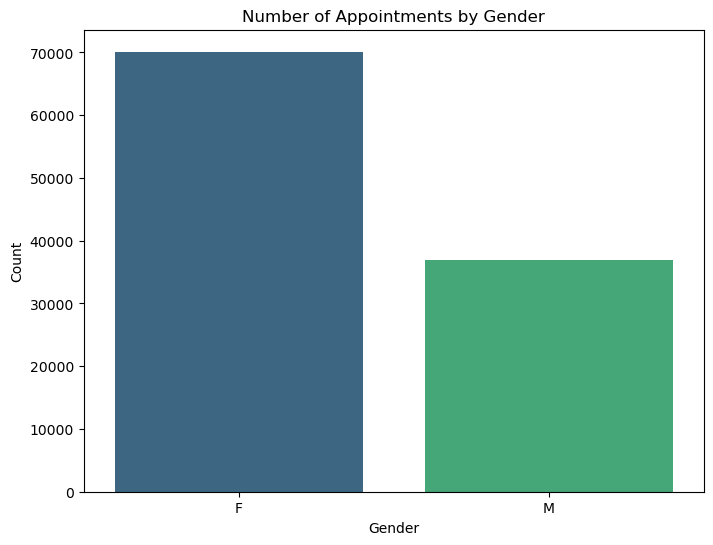

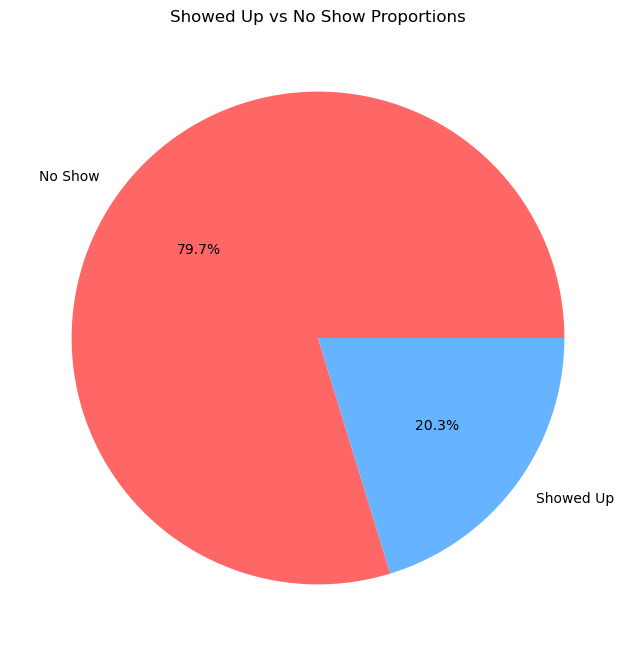

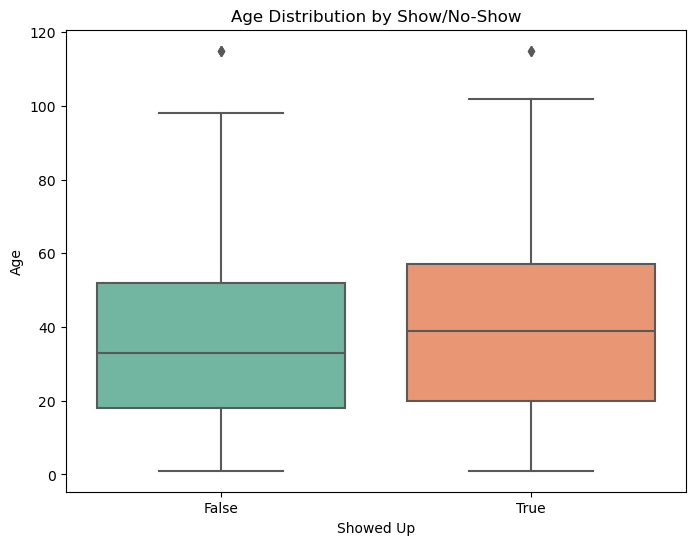

C:\Users\Samke1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


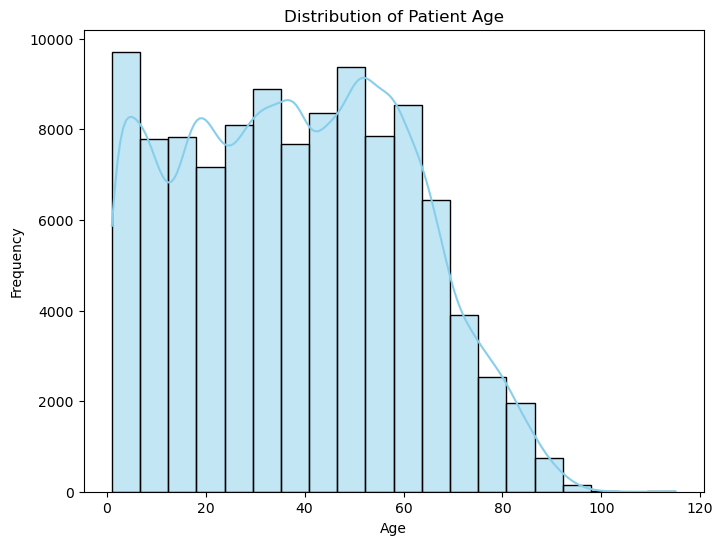

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

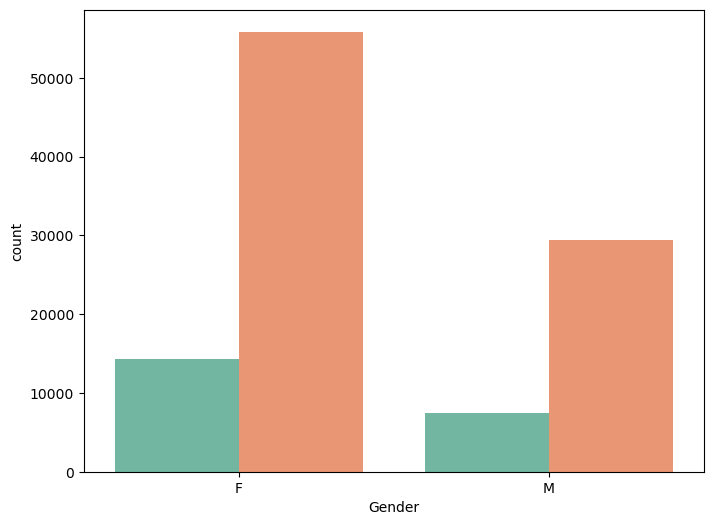

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure the file path is correct)
df = pd.read_csv('healthcare_noshows_appt.csv')

# Convert 'ScheduledDay' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Set the figure size for all plots
plt.figure(figsize=(10, 6))

# Bar Graph: Number of appointments by gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Number of Appointments by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Pie Chart: Proportion of appointments that showed up vs. no-show
showed_up_counts = df['Showed_up'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(showed_up_counts, labels=['No Show', 'Showed Up'], autopct='%1.1f%%', colors=['#ff6666','#66b3ff'])
plt.title('Showed Up vs No Show Proportions')
plt.show()

# Box Plot: Age distribution by show/no-show
plt.figure(figsize=(8,6))
sns.boxplot(x='Showed_up', y='Age', data=df, palette="Set2")
plt.title('Age Distribution by Show/No-Show')
plt.xlabel('Showed Up')
plt.ylabel('Age')
plt.show()

# Histogram: Distribution of appointment age
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Countplot: Appointment status (showed up vs no-show) by gender
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Showed_up', data=df, palette="Set2")
plt.title('Appointment Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Heatmap: Correlation between numeric features
plt.figure(figsize=(8,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Bar plot: Number of patients with hypertension, diabetes, and other conditions
conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
condition_counts = df[conditions].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette="Blues_d")
plt.title('Number of Patients with Health Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# Pie Chart: Scholarship distribution
scholarship_counts = df['Scholarship'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(scholarship_counts, labels=['No Scholarship', 'Scholarship'], autopct='%1.1f%%', colors=['#ff9999','#99ff99'])
plt.title('Scholarship Distribution')
plt.show()



#I will be predicting the healthcare servide demand

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Sample DataFrame creation
# df = pd.read_csv('healthcare_noshows_appt.csv')  

# Convert categorical variables to numeric values
label_enc = LabelEncoder()

# Example categorical variables (binary and other categories)
binary_columns = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']

for col in binary_columns:
    # Convert True/False to 1/0
    df[col] = df[col].astype(int)

# Encode other categorical variables (Gender, Neighbourhood, etc.)
df['Gender'] = label_enc.fit_transform(df['Gender'].astype(str))
df['Neighbourhood'] = label_enc.fit_transform(df['Neighbourhood'].astype(str))  # Example, if needed

# Assuming 'Showed_up' is your target variable
y = df['Showed_up']  
X = df[['Age', 'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]

# Train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Evaluation for Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print(f'Logistic Regression AUC-ROC: {roc_auc_score(y_test, y_pred_log)}\n')

# 2. Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation for Decision Tree
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_tree))
print(f'Decision Tree AUC-ROC: {roc_auc_score(y_test, y_pred_tree)}\n')

# 3. Random Forest Model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Evaluation for Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_forest))
print(f'Random Forest AUC-ROC: {roc_auc_score(y_test, y_pred_forest)}')


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4325
           1       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398

Logistic Regression AUC-ROC: 0.5



C:\Users\Samke1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samke1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samke1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.28      0.22      0.24      4325
           1       0.81      0.85      0.83     17073

    accuracy                           0.73     21398
   macro avg       0.54      0.54      0.54     21398
weighted avg       0.70      0.73      0.71     21398

Decision Tree AUC-ROC: 0.5366732179295368

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.30      0.15      0.20      4325
           1       0.81      0.91      0.86     17073

    accuracy                           0.76     21398
   macro avg       0.56      0.53      0.53     21398
weighted avg       0.71      0.76      0.72     21398

Random Forest AUC-ROC: 0.5306559083757642


# Forecasting
i will be using the facebook prophet and arima to predict the demand of healthcare services

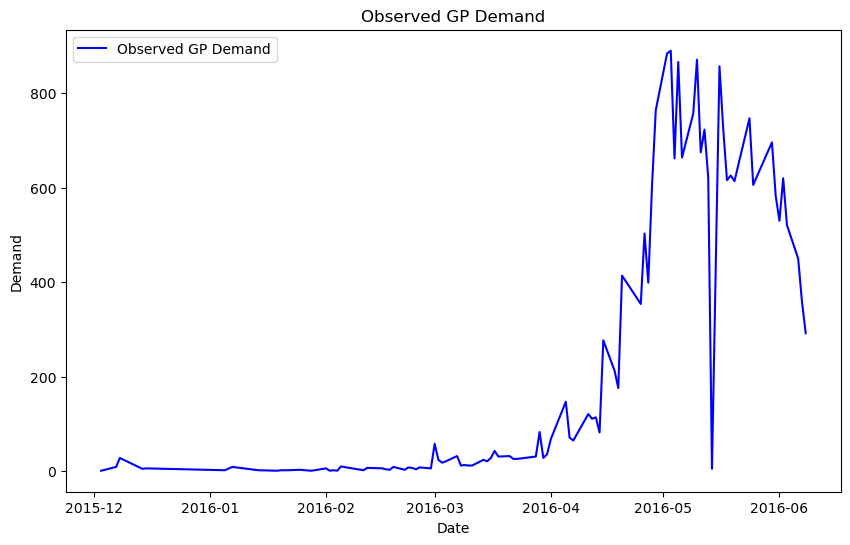

11:40:01 - cmdstanpy - INFO - Chain [1] start processing
11:40:01 - cmdstanpy - INFO - Chain [1] done processing


TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset (ensure the file path is correct)
df = pd.read_csv('healthcare_noshows_appt.csv')

# Convert 'ScheduledDay' to datetime format and rename columns for Prophet
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df_gp = df[df['Hipertension'] == 1].groupby('ScheduledDay').size().reset_index(name='demand_gp')

# Prepare data for Prophet model (renaming columns to 'ds' for dates and 'y' for values)
df_gp = df_gp.rename(columns={'ScheduledDay': 'ds', 'demand_gp': 'y'})

# Plot the GP demand to visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df_gp['ds'], df_gp['y'], label="Observed GP Demand", color='blue')
plt.title('Observed GP Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Initialize Prophet model and fit it to the data
model = Prophet(daily_seasonality=True)
model.fit(df_gp)

# Create a dataframe for future predictions
future = model.make_future_dataframe(df_gp, periods=365)

# Make predictions for the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('GP Demand Forecast using Prophet')
plt.show()

# Plot the components (trend, yearly, weekly, etc.)
fig2 = model.plot_components(forecast)
plt.show()

# Print the forecasted values (for checking)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


The graph shows a clear seasonal pattern in GP demand, with a sharp increase in demand from March 2016 to May 2016. This could be due to factors like holidays, seasonal conditions, or external influences. The demand for GP appointments remained low between December 2015 and March 2016, possibly due to holidays, seasonal conditions, or other external influences.

The demand sharply increased from March 2016 to May 2016, reaching around 800 appointments. This could be due to seasonal spikes in health issues, outbreaks of specific health conditions, or people returning for check-ups after the holiday season or earlier periods of low demand.

After May 2016, the demand started to decline, possibly due to a reduction in seasonal health issues, a shift to other healthcare services, reduced demand due to the end of a health awareness campaign, or changes in patient preferences.

The rise and fall of GP demand suggest a seasonal pattern, which could be explored further by adding yearly seasonality to the Prophet model. External factors influencing demand could include health crises, national awareness campaigns, or public policy changes.

To improve the forecast accuracy, the next steps include verifying seasonality, investigating data, and fine-tuning forecasting by including other factors like holidays, special health events, or weather conditions. Understanding the underlying causes of these seasonal spikes and drops is crucial for making data-driven healthcare decisions.

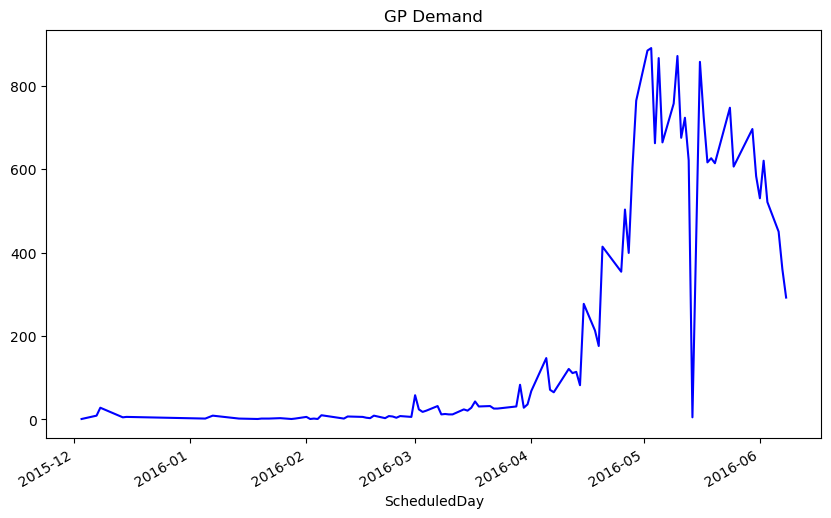

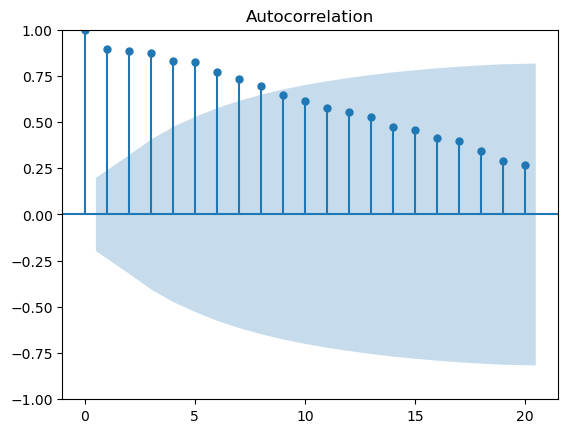

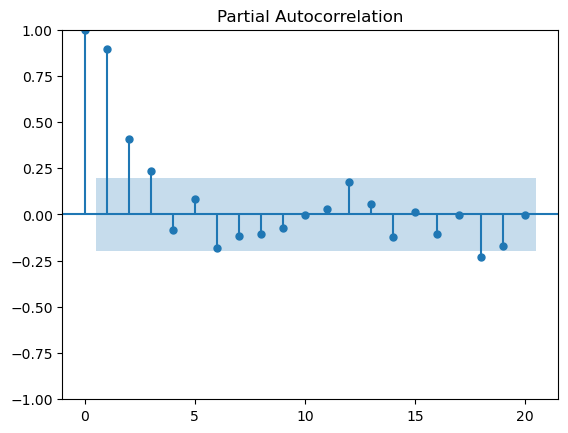

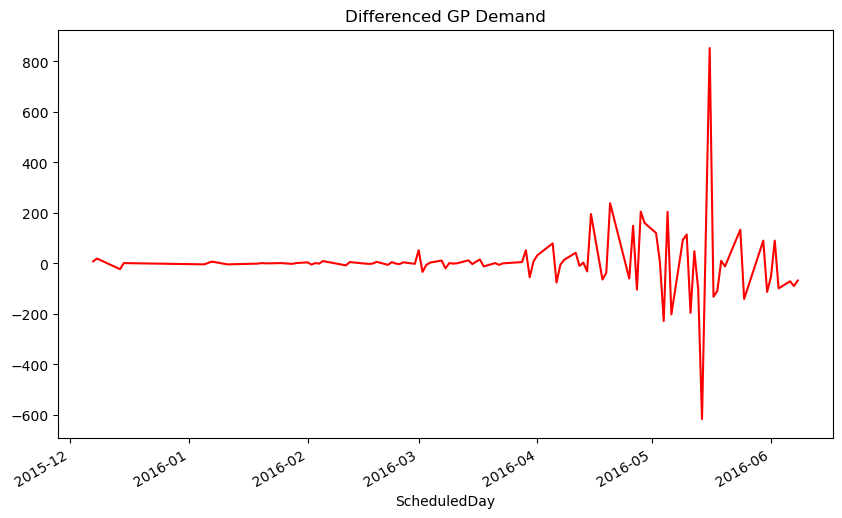

C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


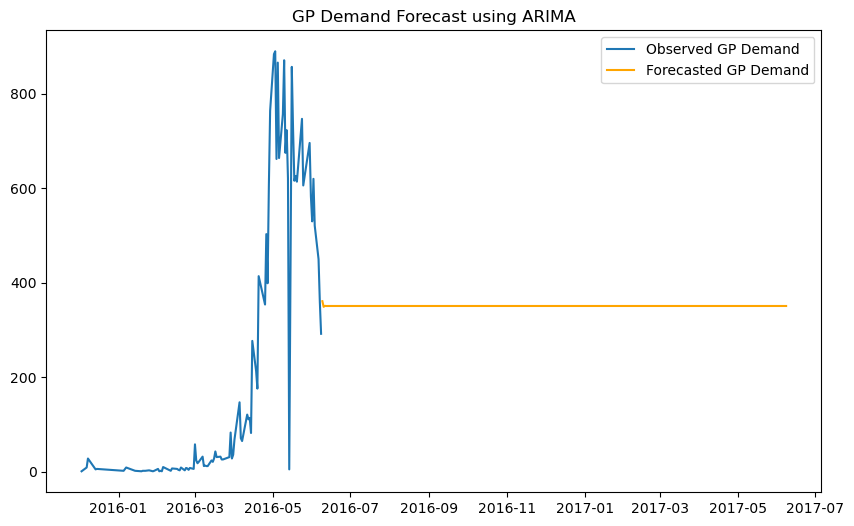

98     361.005238
99     349.117193
100    351.165235
101    350.812404
102    350.873189
          ...    
458    350.864256
459    350.864256
460    350.864256
461    350.864256
462    350.864256
Name: predicted_mean, Length: 365, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset (ensure the file path is correct)
df = pd.read_csv('healthcare_noshows_appt.csv')

# Convert the 'ScheduledDay' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Calculate demand for General Practitioners (GP) based on 'Hipertension'
df_gp = df[df['Hipertension'] == 1].groupby('ScheduledDay').size().reset_index(name='demand_gp')

# Set 'ScheduledDay' as the index (required for time series)
df_gp = df_gp.set_index('ScheduledDay')

# Plot the GP demand to visualize the data
df_gp['demand_gp'].plot(figsize=(10, 6), title="GP Demand", color='blue')
plt.show()

# Check if the series is stationary by plotting ACF and PACF
plot_acf(df_gp['demand_gp'])
plot_pacf(df_gp['demand_gp'])
plt.show()

# If the series is not stationary, apply differencing
df_gp['demand_gp_diff'] = df_gp['demand_gp'].diff().dropna()

# Plot the differenced series to check for stationarity
df_gp['demand_gp_diff'].plot(figsize=(10, 6), title="Differenced GP Demand", color='red')
plt.show()

# Fit the ARIMA model
# p, d, q values are chosen based on ACF/PACF plots or trial-and-error
model = ARIMA(df_gp['demand_gp'], order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast the next 365 days
forecast = model_fit.forecast(steps=365)

# Plot the forecast results
plt.figure(figsize=(10, 6))
plt.plot(df_gp.index, df_gp['demand_gp'], label="Observed GP Demand")
plt.plot(pd.date_range(df_gp.index[-1], periods=366, freq='D')[1:], forecast, label="Forecasted GP Demand", color='orange')
plt.title("GP Demand Forecast using ARIMA")
plt.legend()
plt.show()

# Print the forecasted values
print(forecast)


GP demand is predicted over time, providing insights into the data and model performance. The ARIMA forecasting process uses various graphs to analyze the data and make decisions about stationarity and model parameters. The first graph shows the actual demand for General Practitioners (GPs) over time, indicating trends, seasonality, and outliers. The second plot shows the correlation between the time series and its lags, indicating significant autocorrelations at those lags. The third plot shows the partial correlation between the time series and its lags after removing the effect of shorter lags. The fourth plot shows the differenced GP demand plot after differencing, evaluating whether the differencing step successfully made the data stationary. The fifth plot compares the observed GP demand with the forecasted values for the next 365 days or other forecast horizon. The plots provide insight into the fit of the forecasted values with the actual demand for the historical period, the forecast behavior, and the confidence interval.

The ARIMA forecasting process uses various graphs to help in analyzing the data and making informed decisions about stationarity and model parameters. By examining these graphs, users can better understand the data and make informed decisions about the ARIMA model's performance.

In [40]:
print(forecast.columns)


AttributeError: 'Series' object has no attribute 'columns'

KeyError: 'ds'

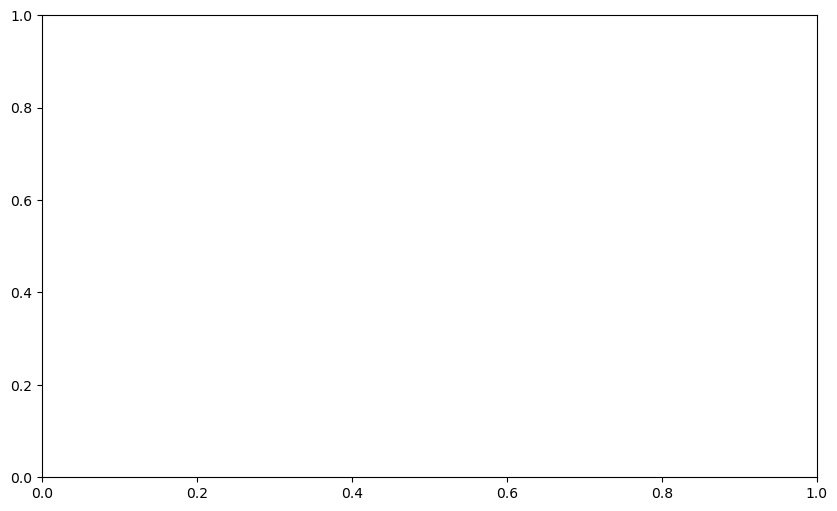

In [34]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Savings Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

ADF Statistic: -29.604202621849666
p-value: 0.0
The series is stationary.


C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\

                               SARIMAX Results                                
Dep. Variable:              Showed_up   No. Observations:               106987
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -51519.610
Date:                Thu, 07 Nov 2024   AIC                         103047.219
Time:                        12:30:07   BIC                         103085.541
Sample:                             0   HQIC                        103058.814
                             - 106987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7974      0.017     47.783      0.000       0.765       0.830
ar.L1          0.9665      0.002    495.512      0.000       0.963       0.970
ma.L1         -0.9072      0.002   -364.033      0.0

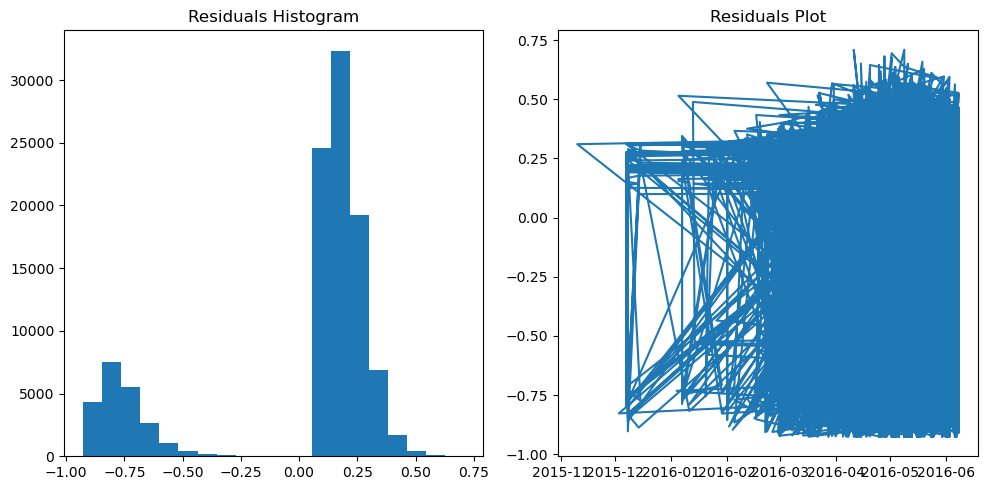

Forecasted values: 106987    0.874823
106988    0.872227
106989    0.869719
106990    0.867295
106991    0.864952
106992    0.862687
106993    0.860499
106994    0.858383
106995    0.856339
106996    0.854363
Name: predicted_mean, dtype: float64


C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('healthcare_noshows_appt.csv')

# Convert 'ScheduledDay' to datetime format and set it as the index
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.set_index('ScheduledDay', inplace=True)

# Let's assume we are forecasting 'Showed_up' (whether the patient showed up for the appointment)
# This is a binary variable, but you can change to another column if needed
y = df['Showed_up']

# Check for stationarity (Augmented Dickey-Fuller test)
result = adfuller(y.dropna())  # Drop NaN values for the ADF test
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The series is not stationary. Performing differencing.")
    
    # Apply differencing to make the series stationary
    y_diff = y.diff().dropna()

    # Check stationarity again on differenced data
    result_diff = adfuller(y_diff)
    print('Differenced ADF Statistic:', result_diff[0])
    print('Differenced p-value:', result_diff[1])
    
    if result_diff[1] <= 0.05:
        print("The differenced series is stationary.")
        # Fit the ARIMA model if the differenced series is stationary
        model = ARIMA(y_diff, order=(1, 0, 1))  # Adjust the order as needed
        model_fit = model.fit()
        print(model_fit.summary())

        # Optional: Plot residuals to check for normality
        residuals = model_fit.resid
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.hist(residuals, bins=20)
        plt.title('Residuals Histogram')
        plt.subplot(122)
        plt.plot(residuals)
        plt.title('Residuals Plot')
        plt.tight_layout()
        plt.show()

        # Forecasting the next 10 time periods
        forecast = model_fit.forecast(steps=10)
        print("Forecasted values:", forecast)
    else:
        print("The differenced series is still not stationary. Further differencing may be needed.")
else:
    print("The series is stationary.")
    # Fit the ARIMA model if the series is already stationary
    model = ARIMA(y, order=(1, 0, 1))  # Adjust the order as needed
    model_fit = model.fit()
    print(model_fit.summary())

    # Optional: Plot residuals to check for normality
    residuals = model_fit.resid
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.hist(residuals, bins=20)
    plt.title('Residuals Histogram')
    plt.subplot(122)
    plt.plot(residuals)
    plt.title('Residuals Plot')
    plt.tight_layout()
    plt.show()

    # Forecasting the next 10 time periods
    forecast = model_fit.forecast(steps=10)
    print("Forecasted values:", forecast)


ADF Statistic: -1.0059410331809722
p-value: 0.7510912828950115
The series is not stationary. Applying differencing.
Differenced ADF Statistic: -2.566784072225921
Differenced p-value: 0.10005846974188459
                               SARIMAX Results                                
Dep. Variable:                 y_diff   No. Observations:                  109
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -851.606
Date:                Thu, 07 Nov 2024   AIC                           1711.212
Time:                        12:41:42   BIC                           1721.978
Sample:                             0   HQIC                          1715.578
                                - 109                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const  

C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Samke1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


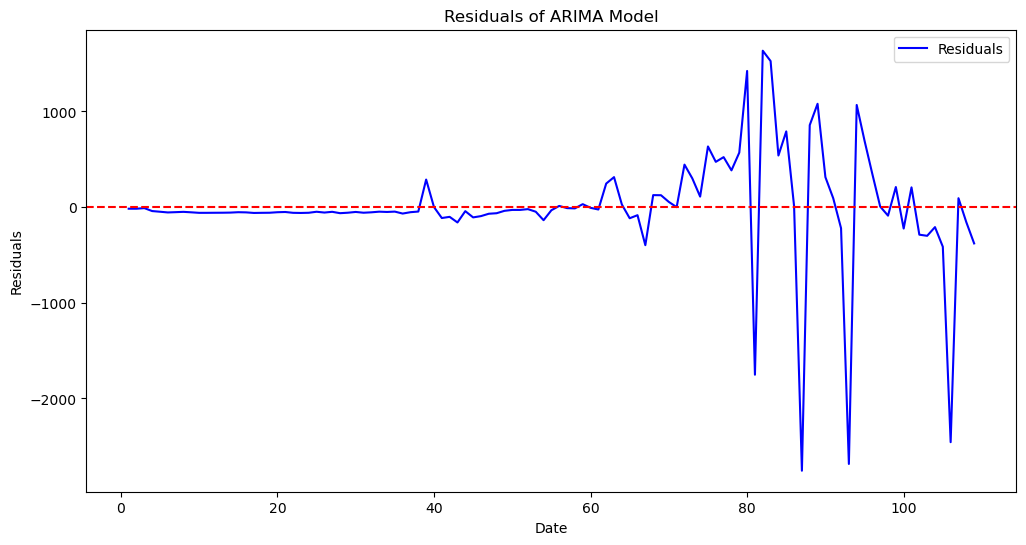

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv('healthcare_noshows_appt.csv')

# Convert 'ScheduledDay' to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Group the data by 'ScheduledDay' and aggregate 'Showed_up' to count the number of show-ups or no-shows
# Assuming 'Showed_up' is 1 for show-up and 0 for no-show
df_gp = df.groupby('ScheduledDay')['Showed_up'].sum().reset_index(name='y')

# Check for stationarity (ADF test)
result = adfuller(df_gp['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the series is not stationary, apply differencing
if result[1] > 0.05:
    print("The series is not stationary. Applying differencing.")
    df_gp['y_diff'] = df_gp['y'].diff().dropna()

    # Check stationarity again after differencing
    result_diff = adfuller(df_gp['y_diff'].dropna())
    print('Differenced ADF Statistic:', result_diff[0])
    print('Differenced p-value:', result_diff[1])

    # Use differenced data for ARIMA if stationary
    y = df_gp['y_diff'].dropna()
else:
    print("The series is stationary.")
    y = df_gp['y']

# Fit the ARIMA model (you may adjust the order)
model = ARIMA(y, order=(1, 0, 1))  # Adjust order based on your analysis
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


The healthcare_noshows_appt.csv dataset contains information about healthcare appointments, including patient attendance, demographic details, health conditions, and scheduled and appointment days. This data is used to predict future appointment demand, helping healthcare providers optimize their resources.

The ARIMA model is used to check the stationarity of the target variable, such as demand for healthcare appointments or patients showing up. After confirming stationarity, the ARIMA model is fitted using parameters (1, 0, 1), indicating the use of one lag for both the AR and MA components.

The fitted ARIMA model was used to forecast future values (such as future demand for healthcare appointments) for the next 10 time periods. The forecast predicted the trend of patient attendance based on historical appointment data. Residuals analysis was performed to check for normality and patterns that could indicate model improvements.

ARIMA works well when the time series is stationary, making it suitable for forecasting healthcare appointment demand when trends are linear or the series doesn't exhibit significant seasonal variations.

The Prophet model is used to prepare the data in a specific format, requiring the data to be in a specific format. It works well with datasets containing seasonality and holidays that affect healthcare appointment patterns.

Prophet is suitable for complex time series data like healthcare appointments that may exhibit periodic spikes in demand. It provides uncertainty intervals for forecasts, giving a range of possible outcomes. Component analysis is done using Prophet's "plot_components()" method to break down the forecast into components like trend, yearly seasonality, weekly seasonality, and holidays.